<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_04_DNN%EA%B8%B0%EC%B4%88_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.04 DNN기초 - 이진분류 모델


---
* 날짜: 2022-06-28
* 이름: 김민규

## 학습내용
    - 딥러닝을 이용한 이진분류 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 11장, 13장
* 데이터
  * `sornar.csv`
  * `pima-indians-diabetes.csv`


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

fatal: destination path 'SkillTreePython-DeepLearning' already exists and is not an empty directory.


## 소나 데이터 광물 예측
---

> 1988년 존스홉킨스 대학교의 세즈노프스키(Sejnowski) 교수는 광석과 일반 돌을 가져다 놓고 음파 탐지기를 쏜 후 그 결과를 데이터를 정리했습니다. 신경망이 광석과 돌을 얼마나 잘 구분하는지 알아보도록 합시다.

```
- 0~59 : 음파 탐지기를 이용해 얻은 값
- 60: 광석 구분 {R, M}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-01.PNG?raw=true width=450>
</p>




### | 데이터 준비

#### **데이터 로드**
* `sonar.csv`

In [6]:
data_path ='/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
df = pd.read_csv(data_path,
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


#### **데이터 전처리**

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def path2data_sonar(path, seed=1):
    # 데이터 적절히 불러오기
    df = pd.read_csv(data_path,
                     header=None, # 첫번째 행이 데이터 (칼럼이 없음)
                     )
    # x-y 분할
    x = df.values[:,0:-1] # 모든 행(샘플), 0부터 59까지 열(속성)
    y = df.values[:,-1] # 모든 행(샘플), 60번째 열(속성)
    
    # 정규화 (x의 모든 속성, y는 하지 않음)
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # 라벨링 (y 라벨링, x는 하지 않음)
    labeling = LabelEncoder()
    y = labeling.fit_transform(y)

    # train-test 데이터 분할
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                        random_state=seed, stratify=y) # stratify는 train_test 분할 시 클레스 비율을 비슷하게 유지해 줍니다.
    return x_train, x_test, y_train, y_test

data_path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
x_train, x_test, y_train, y_test = path2data_sonar(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])

(145, 60) (63, 60) (145,) (63,)
[-0.73091423  0.14791278  0.43217734 -0.193733   -0.27973353 -1.17141213
 -1.11368502 -1.1830759  -0.61643936  0.02789771 -0.54396541 -0.43025161
  0.20832115 -0.57696915 -1.27359777 -0.60100177 -0.1911599  -0.2737382
  0.34226731  0.25514539 -0.11259861 -0.65372658 -0.80968198 -1.27254722
 -0.12615184  0.8203173   0.79833763 -0.82844031 -1.28832161 -1.57084217
 -1.63565539 -0.34053744  0.08145143 -0.41196074 -0.34881305  0.09887612
  0.77837874  0.34473565  1.128427    1.06935769  0.14029395  0.01132786
 -0.08251782  0.11825963 -0.54032991 -0.66033662 -0.69576299 -0.9575622
 -0.19317929 -0.27318109 -0.69023617 -0.53275402 -0.71118685  0.88684983
  1.34495706 -0.49309408  0.62024838  1.80515572  1.09602656 -0.0612105 ] 1


* 예측값 분포 확인

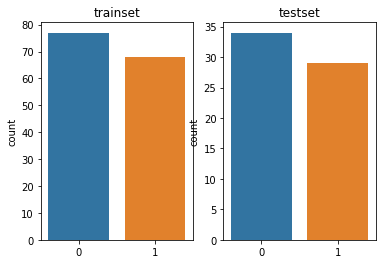

In [11]:
plt.subplot(121);sns.countplot(x=y_train);plt.title('trainset')
plt.subplot(122);sns.countplot(x=y_test);plt.title('testset')
plt.show()

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0104-02.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [12]:
from tensorflow.keras import models, layers, utils

def build_model():
    x = layers.Input(shape=(60,)) # 데이터가 주어지면 인풋의 shape는 고정
    z = layers.Dense(30,activation='relu')(x)
    y = layers.Dense(1, activation='sigmoid')(z) # 데이터가 주어지면 아웃풋의 shape는 고정 
    # (이진분류문제는 마지막 아웃풋 shape가 1, 마지막 활성함수는 sigmoid를 사용합니다.)
    model = models.Model(x,y, name='sonar_classifier')
    return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "sonar_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,861
Trainable params: 1,861
Non-trainable params: 0
_________________________________________________________________


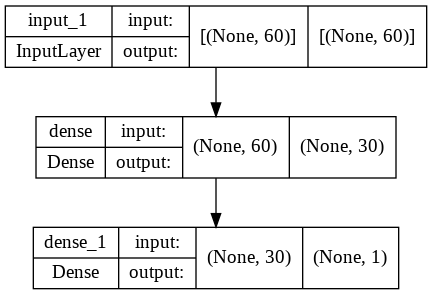

In [13]:
model = build_model()
model.summary()

# 시각화
utils.plot_model(model, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 'binary_crossentropy'
* `optimizer` : 'adam'
* `metrics`: 'accuracy'


In [14]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 (업데이트 한번에 사용될 샘플 개수)

In [15]:
model.fit(x_train, y_train,
          epochs = 200,
          batch_size = 16)

Epoch 1/200
10/10 [==============================] - 1s 3ms/step - loss: 0.8359 - accuracy: 0.4414
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.5172
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.5862
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.6897
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7172
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7241
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7517
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.7655
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.7931
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8000
Epoch 11/

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [16]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.4233 - accuracy: 0.9048


[0.4233468472957611, 0.9047619104385376]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [18]:
y_pred = model.predict(x_test)
print(y_pred[0], y_test[0])
y_pred = y_pred.flatten()
y_test.shape,y_pred.shape 

[0.8380451] 1


((63,), (63,))

In [19]:
np.round(y_pred)

array([1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.], dtype=float32)

* 예측 시각화

[[30  4]
 [ 2 27]]


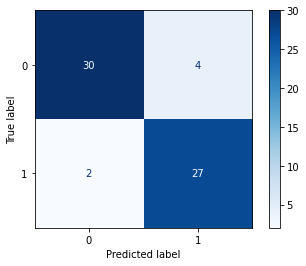

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 함수 인풋 배열은 정수가 되야 된다.
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 : 0 에서 1 사이의 확률 값
* 예측값의 shape : (샘플 개수, ) 혹은 (샘플 개수, 1)
* 아웃풋 레이어의 노드 개수 : 1
* 아웃풋 레이어의 activation : sigmoid
* 손실함수 (loss) : binary crossentropy
* 평가함수 (metrics) : accuracy

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

(145, 60) (63, 60) (145,) (63,)
[-0.73091423  0.14791278  0.43217734 -0.193733   -0.27973353 -1.17141213
 -1.11368502 -1.1830759  -0.61643936  0.02789771 -0.54396541 -0.43025161
  0.20832115 -0.57696915 -1.27359777 -0.60100177 -0.1911599  -0.2737382
  0.34226731  0.25514539 -0.11259861 -0.65372658 -0.80968198 -1.27254722
 -0.12615184  0.8203173   0.79833763 -0.82844031 -1.28832161 -1.57084217
 -1.63565539 -0.34053744  0.08145143 -0.41196074 -0.34881305  0.09887612
  0.77837874  0.34473565  1.128427    1.06935769  0.14029395  0.01132786
 -0.08251782  0.11825963 -0.54032991 -0.66033662 -0.69576299 -0.9575622
 -0.19317929 -0.27318109 -0.69023617 -0.53275402 -0.71118685  0.88684983
  1.34495706 -0.49309408  0.62024838  1.80515572  1.09602656 -0.0612105 ] 1
Epoch 1/200
29/29 [==============================] - 1s 3ms/step - loss: 5.3745e-06 - accuracy: 1.0000
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 3.8229e-06 - accuracy: 1.0000
Epoch 3/200
29/29 [============

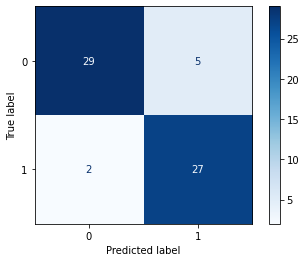

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def path2data_sonar(path, seed=1):
    # 데이터 적절히 불러오기
    df = pd.read_csv(data_path,
                     header=None, # 첫번째 행이 데이터 (칼럼이 없음)
                     )
    # x-y 분할
    x = df.values[:,0:-1] # 모든 행(샘플), 0부터 59까지 열(속성)
    y = df.values[:,-1] # 모든 행(샘플), 60번째 열(속성)
    
    # 정규화 (x의 모든 속성, y는 하지 않음)
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # 라벨링 (y 라벨링, x는 하지 않음)
    labeling = LabelEncoder()
    y = labeling.fit_transform(y)

    # train-test 데이터 분할
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                        random_state=seed, stratify=y) # stratify는 train_test 분할 시 클레스 비율을 비슷하게 유지해 줍니다.
    return x_train, x_test, y_train, y_test

data_path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
x_train, x_test, y_train, y_test = path2data_sonar(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])

from tensorflow.keras import models, layers, utils

def build_model():
    x = layers.Input(shape=(60,)) # 데이터가 주어지면 인풋의 shape는 고정
    z = layers.Dense(50,activation='relu')(x)
    z = layers.Dense(40,activation='relu')(x)  
    z = layers.Dense(30,activation='relu')(x)
    z = layers.Dense(25,activation='relu')(x)
    z = layers.Dense(17,activation='relu')(x)
    z = layers.Dense(10,activation='relu')(x)
    z = layers.Dense(6,activation='relu')(x)    
    y = layers.Dense(1, activation='sigmoid')(z) # 데이터가 주어지면 아웃풋의 shape는 고정 
    # (이진분류문제는 마지막 아웃풋 shape가 1, 마지막 활성함수는 sigmoid를 사용합니다.)
    model = models.Model(x,y, name='sonar_classifier')
    return model

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

model.fit(x_train, y_train,
          epochs = 200,
          batch_size = 5)

model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)
print(y_pred[0], y_test[0])
y_pred = y_pred.flatten()
y_test.shape,y_pred.shape 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 함수 인풋 배열은 정수가 되야 된다.
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')



### | 과제 3. 피마 인디언 당뇨병 예측


* `pima-indians-diabetes.csv`
```
df = pd.read_csv(data_path,
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
```

In [3]:
data_path = '/content/SkillTreePython-DeepLearning/dataset/pima-indians-diabetes.csv'

df = pd.read_csv(data_path,
              names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
print(df.shape)
df.head(10)

(768, 9)


,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


(537, 8) (231, 8) (537,) (231,)
[-0.84488505 -0.74783062  0.04624525  1.22091023 -0.69289057  0.77514938
 -0.76673656 -0.27575966] 0
Model: "pima_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
Epoch 1/350
179/179 [==============================] -

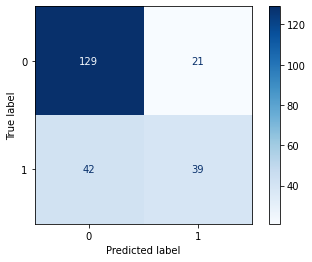

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils

data_path = '/content/SkillTreePython-DeepLearning/dataset/pima-indians-diabetes.csv'

def path2data_pima(path, seed=1):
    # 데이터 적절히 불러오기
    df = pd.read_csv(data_path,
                     header=None, # 첫번째 행이 데이터 (칼럼이 없음)
                     )
    # x-y 분할
    x = df.values[:,0:-1] # 모든 행(샘플), 0부터 59까지 열(속성)
    y = df.values[:,-1] # 모든 행(샘플), 60번째 열(속성)
    
    # 정규화 (x의 모든 속성, y는 하지 않음)
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # 라벨링 (y 라벨링, x는 하지 않음)
    labeling = LabelEncoder()
    y = labeling.fit_transform(y)

    # train-test 데이터 분할
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                        random_state=seed, stratify=y) # stratify는 train_test 분할 시 클레스 비율을 비슷하게 유지해 줍니다.
    return x_train, x_test, y_train, y_test

# data_path = '/content/SkillTreePython-DeepLearning/dataset/sonar.csv'
x_train, x_test, y_train, y_test = path2data_pima(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])


def build_model():
    x = layers.Input(shape=(8,)) # 데이터가 주어지면 인풋의 shape는 고정
    z = layers.Dense(5,activation='relu')(x)
    z = layers.Dense(2,activation='relu')(z)
    y = layers.Dense(1, activation='sigmoid')(z) # 데이터가 주어지면 아웃풋의 shape는 고정 
    # (이진분류문제는 마지막 아웃풋 shape가 1, 마지막 활성함수는 sigmoid를 사용합니다.)
    model = models.Model(x,y, name='pima_classifier')
    return model

model = build_model()
model.summary()

# 시각화
utils.plot_model(model, show_shapes=True)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

model.fit(x_train, y_train,
          epochs = 350,
          batch_size = 3)

model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)
print(y_pred[0], y_test[0])
y_pred = y_pred.flatten()
y_test.shape,y_pred.shape 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 함수 인풋 배열은 정수가 되야 된다.
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')

### | 과제 4. 생각해보기

데이터가 불균형 할 때 딥러닝에서는 어떠한 방법을 써서 이를 해결 하나요? 


불균형 데이터 상태 그대로 예측하게 된다면 과적합 문제가 발생 할 수 있습니다. 대표적으로 과적합은 변수가 많아서 생기는 모델 복잡성 증가, 데이터 불균형으로 생기는 문제 등의 다양한 발생 원인들이 존재합니다.

데이터 불균형성 해결 방법은 크게 1. Under Sampling 2. Over Sampling, 2가지가 있습니다.

Under Sampling은 Down Sampling라고도 불리며 데이터의 분포가 높은 값을 낮은 값으로 맞춰주는 작업을 거치는 것을 말합니다.

오버 샘플링은 Up Sampling라고도 불리며 분포가 작은 클래스의 값을 분포가 큰 클래스로 맞춰주는 샘플링 방법입니다.